In [388]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

In [389]:
train_data = pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [390]:
test_data = pd.read_csv('test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [391]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [392]:
import pandas.testing as tm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

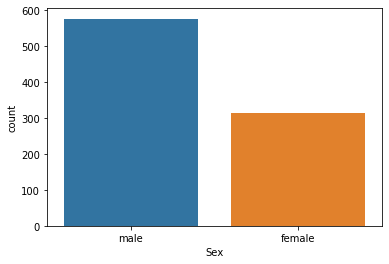

In [393]:
sns.countplot(x='Sex',data=train_data)

In [394]:
def male_female_child(passenger):
    age,sex = passenger
    if age <16:
        return 'child'
    else:
        return sex


In [395]:
train_data['Person'] =  train_data[['Age','Sex']].apply(male_female_child,axis = 1)

In [396]:
train_data[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


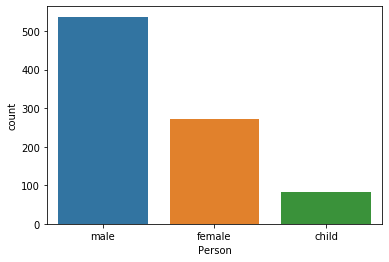

In [397]:
sns.countplot('Person',data=train_data)

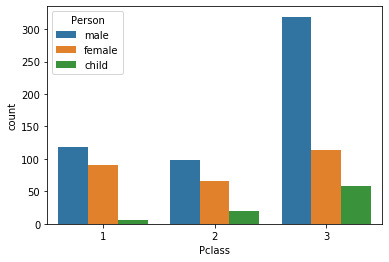

In [398]:
sns.countplot('Pclass',data =train_data,hue = 'Person')

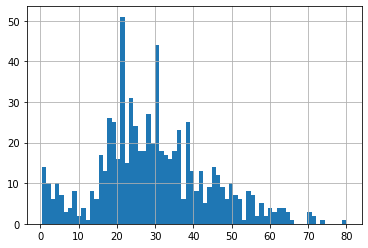

In [399]:
train_data['Age'].hist(bins = 70)

In [400]:
train_data['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

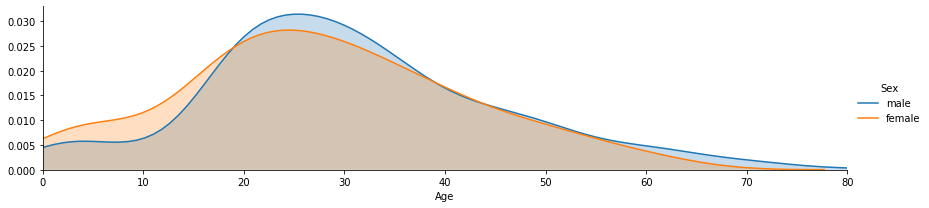

In [401]:
fig = sns.FacetGrid(train_data,aspect=4,hue = 'Sex')
fig.map(sns.kdeplot,'Age',shade = True)
oldest = train_data['Age'].max()
fig.set(xlim = (0,oldest))
fig.add_legend()

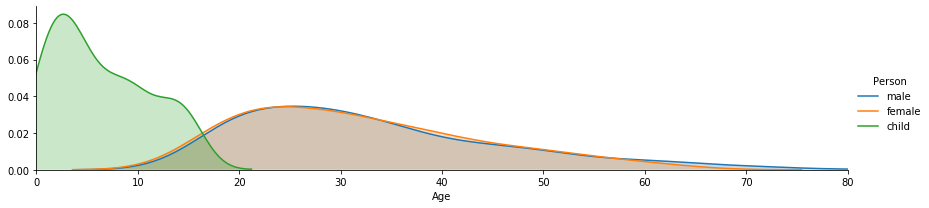

In [402]:
fig = sns.FacetGrid(train_data,aspect=4,hue = 'Person')
fig.map(sns.kdeplot,'Age',shade = True)
oldest = train_data['Age'].max()
fig.set(xlim = (0,oldest))
fig.add_legend()

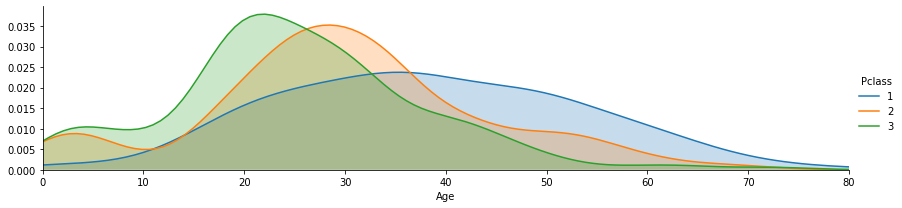

In [403]:
fig = sns.FacetGrid(train_data,aspect=4,hue = 'Pclass')
fig.map(sns.kdeplot,'Age',shade = True)
oldest = train_data['Age'].max()
fig.set(xlim = (0,oldest))
fig.add_legend()

In [404]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [405]:
deck  = train_data['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [406]:
levels = []
for level in deck:
    levels.append(level[0])
cabin_df = DataFrame(levels)

cabin_df.columns = ['cabin']

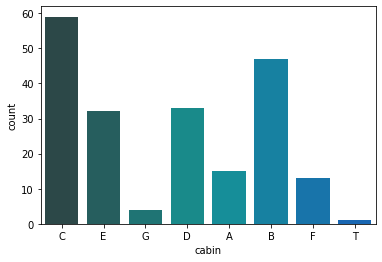

In [407]:

sns.countplot(x='cabin',data=cabin_df,palette='winter_d')


In [408]:
cabin_df = cabin_df[cabin_df.cabin != 'T']

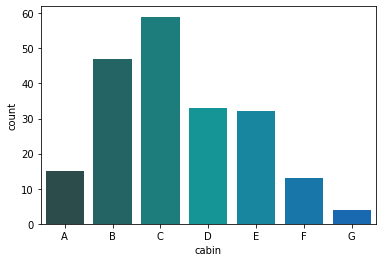

In [409]:

sns.countplot(x='cabin',data=cabin_df,palette='winter_d',order = ['A','B','C','D','E','F','G'])

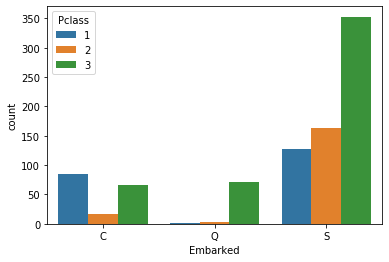

In [410]:

sns.countplot(x= 'Embarked',data=train_data,hue = 'Pclass',order=['C','Q','S'])

In [411]:
#Its a long process
def alone(passenger):
    SibSp,Parch = passenger
    if SibSp ==0 and Parch ==0:
           return 'Alone'
    else:
        return 'Notalone'

In [412]:
train_data['Status'] = train_data[['SibSp','Parch']].apply(alone,axis = 1)

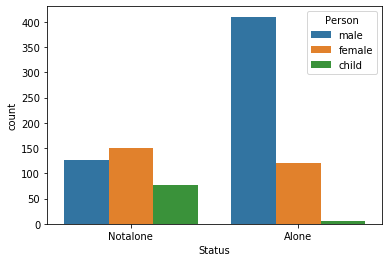

In [413]:
sns.countplot(x= 'Status',data=train_data,hue = 'Person')

In [414]:
train_data['Alone'] = train_data['SibSp'] + train_data['Parch']

In [415]:
train_data['Alone'][train_data['Alone']!=0] = 'With Family'
train_data['Alone'][train_data['Alone']==0] = 'With no Family'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [416]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Status,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,Notalone,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,Notalone,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,With no Family
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,Notalone,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,With no Family


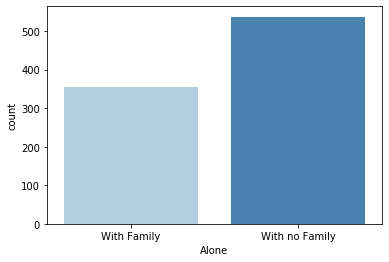

In [417]:
sns.countplot('Alone',data = train_data,palette = 'Blues')

In [418]:
train_data['Survival'] = train_data.Survived.map({0:'Died',1:'Alive'})
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Status,Alone,Survival
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,Notalone,With Family,Died
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,Notalone,With Family,Alive
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,With no Family,Alive
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,Notalone,With Family,Alive
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,With no Family,Died


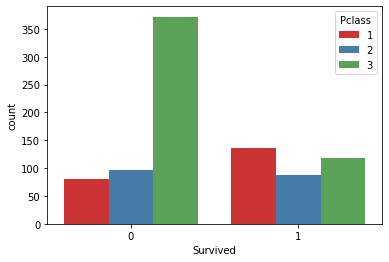

In [424]:
sns.countplot('Survived',data=train_data,palette='Set1',hue='Pclass')

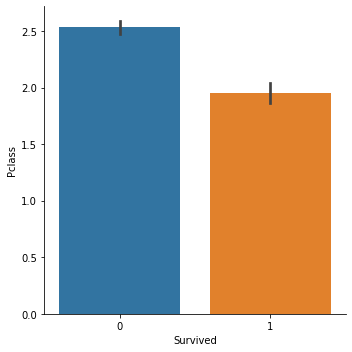

In [425]:
sns.catplot('Survived','Pclass',data=train_data,kind='bar')

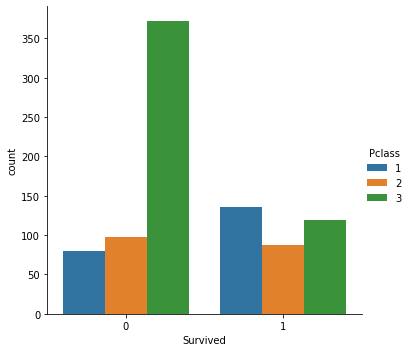

In [426]:
sns.catplot('Survived',data=train_data,kind = 'count',hue = 'Pclass')

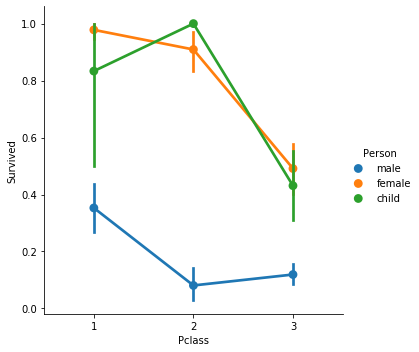

In [431]:
sns.catplot('Pclass','Survived',data=train_data,kind = 'point',hue='Person')

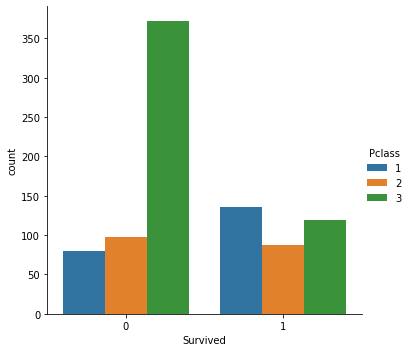

In [432]:
sns.catplot('Survived',data=train_data,kind = 'count',hue = 'Pclass')

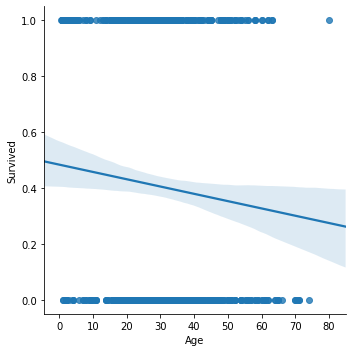

In [433]:
sns.lmplot(x = "Age",y = "Survived",data=train_data)

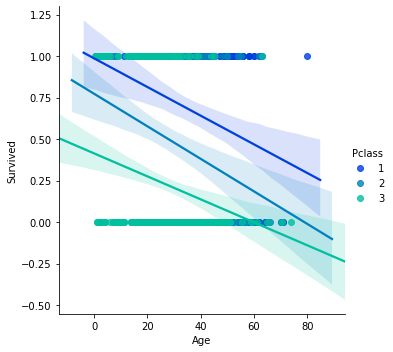

In [435]:
sns.lmplot(x = "Age",y = "Survived",data=train_data,hue = 'Pclass',palette='winter')

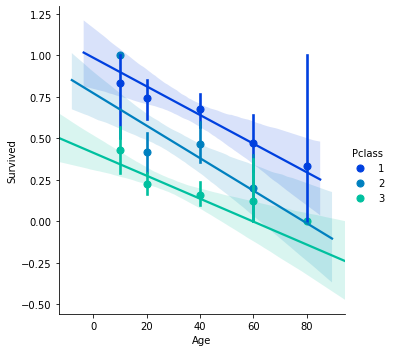

In [436]:
generations = [10,20,40,60,80]
sns.lmplot(x = "Age",y = "Survived",data=train_data,hue = 'Pclass',palette='winter',x_bins=generations)

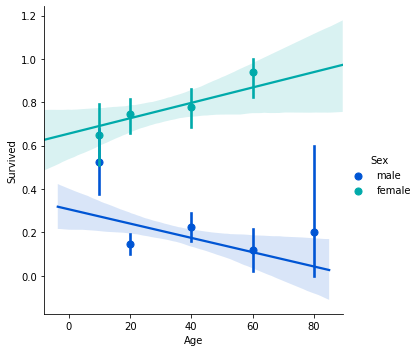

In [439]:
sns.lmplot(x = "Age",y = "Survived",data=train_data,hue = 'Sex',palette='winter',x_bins=generations)

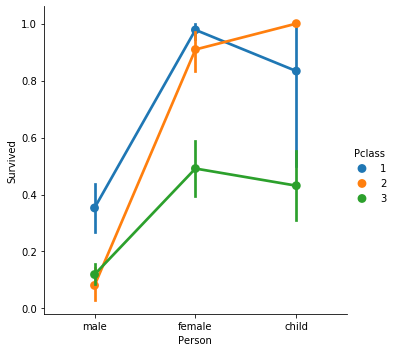

In [475]:
sns.catplot(x= 'Person',y = 'Survived',data = train_data,kind = 'point',hue='Pclass')

In [487]:
cabin_df['survived'] = train_data['Survived']

In [488]:
cabin_df.head()

,cabin,survived
0,C,0
1,C,1
2,E,1
3,G,1
4,C,0
